In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from pandas import set_option 
from pandas.plotting import scatter_matrix 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier,\
ExtraTreesClassifier

In [2]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl 
mpl.rc('axes', labelsize=14) 
mpl.rc('xtick', labelsize=12) 
mpl.rc('ytick', labelsize=12)

In [3]:
train_data_path = './data/d_training_set.csv' 
df = pd.read_csv(train_data_path)

In [4]:
df.head(5)

,row_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,repaid_loan
0,30001,10000,10000,10000.0,36 months,7.89%,312.86,A,A5,Driver,...,78.6,0.0,0,0,244931,4640,2400,3313,Cash,1
1,30002,27500,27500,27500.0,60 months,9.80%,581.60,B,B3,Branch Specialist,...,100.0,0.0,0,0,339800,2839,32100,0,Cash,1
2,30003,20000,20000,20000.0,36 months,14.46%,688.03,C,C4,VP of Sales,...,100.0,80.0,0,0,82999,53132,57500,24083,Cash,1
3,30004,2900,2900,2900.0,36 months,15.31%,100.98,C,C5,Operations Manager,...,100.0,50.0,0,0,476477,124308,33100,108444,Cash,1
4,30005,2400,2400,2400.0,36 months,18.99%,87.97,E,E1,Education Manager,...,96.6,0.0,1,0,9900,1400,3000,0,Cash,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103887 entries, 0 to 103886
Data columns (total 93 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   row_id                          103887 non-null  int64  
 1   loan_amnt                       103887 non-null  int64  
 2   funded_amnt                     103887 non-null  int64  
 3   funded_amnt_inv                 103887 non-null  float64
 4   term                            103887 non-null  object 
 5   int_rate                        103887 non-null  object 
 6   installment                     103887 non-null  float64
 7   grade                           103887 non-null  object 
 8   sub_grade                       103887 non-null  object 
 9   emp_title                       96875 non-null   object 
 10  emp_length                      96906 non-null   object 
 11  home_ownership                  103887 non-null  object 
 12  annual_inc      

In [6]:
df.shape

(103887, 93)

In [9]:
# Lets look at the data type of each attributes 
set_option('display.max_rows', 500) 
print(df.dtypes)

row_id                              int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
purpose                            object
title                              object
addr_state                         object
dti                               float64
delinq_2yrs                         int64
earliest_cr_line                   object
inq_last_6mths                    float64
mths_since_last_delinq            float64
mths_since_last_record            

#### Summarizing the distribution of each attributes 

In [7]:
# Lets summarize the distribution of each attributes 
df.describe()

,row_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,repaid_loan
count,103887.000000,103887.000000,103887.000000,103887.000000,103887.000000,1.038870e+05,103874.000000,103887.000000,103886.000000,53828.000000,...,103887.000000,103887.000000,103014.000000,103887.000000,103887.000000,1.038870e+05,1.038870e+05,1.038870e+05,1.038870e+05,103887.000000
mean,81944.000000,15581.702475,15581.702475,15574.323975,460.558518,8.028415e+04,19.533214,0.344336,0.577787,33.804581,...,2.250156,94.053458,44.586198,0.131258,0.071424,1.835911e+05,5.407506e+04,2.364990e+04,4.563909e+04,0.818004
std,29989.738045,8856.436183,8856.436183,8854.725240,261.449885,7.533659e+04,9.626113,0.907980,0.881739,22.045960,...,1.930364,8.758595,36.042037,0.381883,0.474582,1.874946e+05,4.993263e+04,2.320256e+04,4.560806e+04,0.385843
min,30001.000000,1000.000000,1000.000000,800.000000,30.120000,0.000000e+00,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,55972.500000,8400.000000,8400.000000,8400.000000,265.680000,4.950000e+04,12.620000,0.000000,0.000000,15.000000,...,1.000000,91.000000,10.000000,0.000000,0.000000,5.414450e+04,2.328600e+04,8.600000e+03,1.656900e+04,1.000000
50%,81944.000000,14400.000000,14400.000000,14400.000000,398.520000,6.800000e+04,18.750000,0.000000,0.000000,30.000000,...,2.000000,97.400000,40.000000,0.000000,0.000000,1.206060e+05,4.100600e+04,1.660000e+04,3.463300e+04,1.000000
75%,107915.500000,21000.000000,21000.000000,21000.000000,612.890000,9.500000e+04,25.760000,0.000000,1.000000,49.000000,...,3.000000,100.000000,75.000000,0.000000,0.000000,2.632730e+05,6.850000e+04,3.090000e+04,6.128450e+04,1.000000
max,133887.000000,40000.000000,40000.000000,40000.000000,1536.950000,9.550000e+06,447.600000,22.000000,5.000000,192.000000,...,31.000000,100.000000,100.000000,8.000000,45.000000,9.999999e+06,1.034841e+06,1.105500e+06,1.183946e+06,1.000000


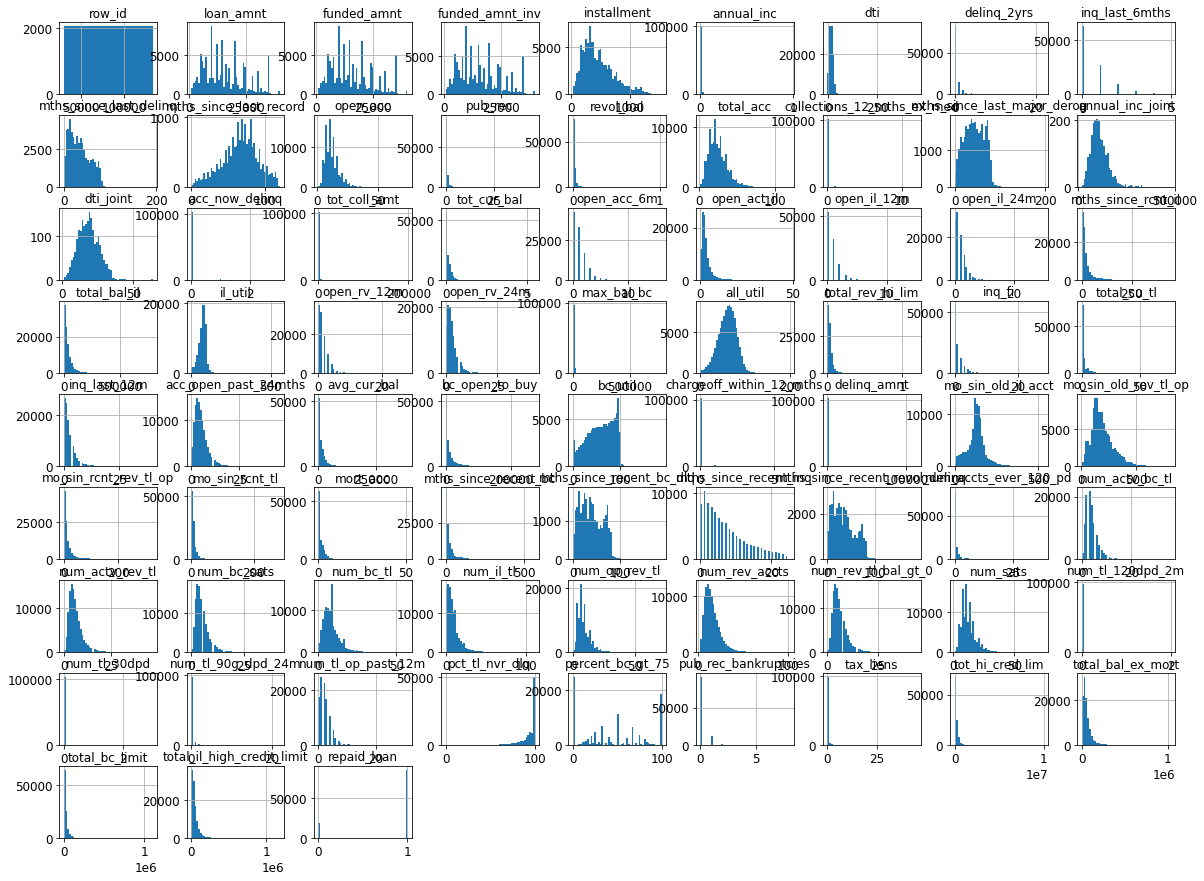

In [8]:
%matplotlib inline 
df.hist(bins=50, figsize=(20, 15))
plt.show()

<AxesSubplot:>

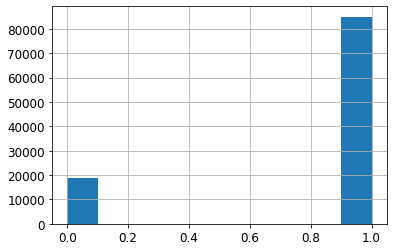

In [9]:
df['repaid_loan'].hist()

#####  The distribution of paid versus no repaid loans, the majority of loans are repaid

#### here we can see that loan default happens relatively rarely in the dataset

In [11]:
notpaid_pct = 18907 / (18907 + 84980)
notpaid_pct

0.18199582238393638

In [12]:
paid_pct = 84980 /(18907 + 84980) 
paid_pct

0.8180041776160636

##### About 20 percent of loans are defaulted

#### Checking correlations in the dataset

In [13]:
corr_matrix = df.corr()

In [14]:
corr_matrix['repaid_loan'].sort_values(ascending=False)

repaid_loan             1.000000
annual_inc_joint        0.098379
bc_open_to_buy          0.090075
total_bc_limit          0.089396
avg_cur_bal             0.077783
                          ...   
open_acc_6m            -0.101999
open_rv_24m            -0.113482
dti_joint              -0.116811
num_tl_op_past_12m     -0.117857
acc_open_past_24mths   -0.135260
Name: repaid_loan, Length: 75, dtype: float64

In [15]:
from pandas.plotting import scatter_matrix

In [11]:
numerical_attributes = (df.dtypes != 'object')
numerical_attributes = list(numerical_attributes[numerical_attributes].index)

In [12]:
numerical_attributes

['row_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'n

In [ ]:
%matplotlib inline
#scatter_matrix(df[attributes], figsize=(12, 8))

array([[<AxesSubplot:xlabel='row_id', ylabel='row_id'>,
        <AxesSubplot:xlabel='loan_amnt', ylabel='row_id'>,
        <AxesSubplot:xlabel='funded_amnt', ylabel='row_id'>, ...,
        <AxesSubplot:xlabel='total_bc_limit', ylabel='row_id'>,
        <AxesSubplot:xlabel='total_il_high_credit_limit', ylabel='row_id'>,
        <AxesSubplot:xlabel='repaid_loan', ylabel='row_id'>],
       [<AxesSubplot:xlabel='row_id', ylabel='loan_amnt'>,
        <AxesSubplot:xlabel='loan_amnt', ylabel='loan_amnt'>,
        <AxesSubplot:xlabel='funded_amnt', ylabel='loan_amnt'>, ...,
        <AxesSubplot:xlabel='total_bc_limit', ylabel='loan_amnt'>,
        <AxesSubplot:xlabel='total_il_high_credit_limit', ylabel='loan_amnt'>,
        <AxesSubplot:xlabel='repaid_loan', ylabel='loan_amnt'>],
       [<AxesSubplot:xlabel='row_id', ylabel='funded_amnt'>,
        <AxesSubplot:xlabel='loan_amnt', ylabel='funded_amnt'>,
        <AxesSubplot:xlabel='funded_amnt', ylabel='funded_amnt'>, ...,
        <AxesSubplot

#### Lets analyze categorical features in the dataset

In [14]:
categorical_attributes = (df.dtypes == 'object')
list_categorical = list(categorical_attributes[categorical_attributes].index)
df_categorical = df[list_categorical]

In [15]:
categorical_attributes

row_id                        False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
term                           True
                              ...  
total_bal_ex_mort             False
total_bc_limit                False
total_il_high_credit_limit    False
disbursement_method            True
repaid_loan                   False
Length: 93, dtype: bool

In [16]:
df_categorical.head(10)

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,title,addr_state,earliest_cr_line,revol_util,initial_list_status,application_type,verification_status_joint,disbursement_method
0,36 months,7.89%,A,A5,Driver,9 years,MORTGAGE,Source Verified,Mar-16,debt_consolidation,Debt consolidation,CA,Nov-06,44.80%,w,Individual,NaN,Cash
1,60 months,9.80%,B,B3,Branch Specialist,10+ years,MORTGAGE,Not Verified,Jan-16,debt_consolidation,Debt consolidation,AL,Jul-98,6.80%,w,Individual,NaN,Cash
2,36 months,14.46%,C,C4,VP of Sales,7 years,RENT,Verified,Feb-16,other,Other,CA,Mar-89,69.20%,w,Individual,NaN,Cash
3,36 months,15.31%,C,C5,Operations Manager,10+ years,MORTGAGE,Source Verified,Mar-16,debt_consolidation,Debt consolidation,TX,Jan-96,61.20%,w,Individual,NaN,Cash
4,36 months,18.99%,E,E1,Education Manager,2 years,RENT,Source Verified,Jan-16,medical,Medical expenses,PA,Jun-95,14.10%,f,Individual,NaN,Cash
5,36 months,14.46%,C,C4,Car sales,< 1 year,MORTGAGE,Source Verified,Mar-16,credit_card,Credit card refinancing,FL,Nov-05,61.70%,w,Individual,NaN,Cash
6,60 months,17.97%,D,D4,Regional Sales Manager,3 years,RENT,Source Verified,Jan-16,debt_consolidation,Debt consolidation,MO,Aug-09,70%,w,Individual,NaN,Cash
7,60 months,12.99%,C,C2,Home Delivery Manager,2 years,MORTGAGE,Source Verified,Mar-16,debt_consolidation,Debt consolidation,UT,Sep-05,32.60%,w,Individual,NaN,Cash
8,36 months,6.99%,A,A3,Elementary Principal,10+ years,MORTGAGE,Not Verified,Jan-16,debt_consolidation,Debt consolidation,MO,Jan-96,78.10%,f,Individual,NaN,Cash
9,60 months,19.99%,E,E1,Vice President,9 years,MORTGAGE,Verified,Mar-16,debt_consolidation,Debt consolidation,CA,Jan-99,25.40%,w,Individual,NaN,Cash


In [23]:
df_categorical[df_categorical.isnull().any(axis=1)]

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,title,addr_state,earliest_cr_line,revol_util,initial_list_status,application_type,verification_status_joint,disbursement_method
0,36 months,7.89%,A,A5,Driver,9 years,MORTGAGE,Source Verified,Mar-16,debt_consolidation,Debt consolidation,CA,Nov-06,44.80%,w,Individual,NaN,Cash
1,60 months,9.80%,B,B3,Branch Specialist,10+ years,MORTGAGE,Not Verified,Jan-16,debt_consolidation,Debt consolidation,AL,Jul-98,6.80%,w,Individual,NaN,Cash
2,36 months,14.46%,C,C4,VP of Sales,7 years,RENT,Verified,Feb-16,other,Other,CA,Mar-89,69.20%,w,Individual,NaN,Cash
3,36 months,15.31%,C,C5,Operations Manager,10+ years,MORTGAGE,Source Verified,Mar-16,debt_consolidation,Debt consolidation,TX,Jan-96,61.20%,w,Individual,NaN,Cash
4,36 months,18.99%,E,E1,Education Manager,2 years,RENT,Source Verified,Jan-16,medical,Medical expenses,PA,Jun-95,14.10%,f,Individual,NaN,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103882,36 months,9.80%,B,B3,Captain,10+ years,RENT,Verified,Jan-16,debt_consolidation,Debt consolidation,SC,Jun-01,46%,w,Individual,NaN,Cash
103883,36 months,7.49%,A,A4,accounting dept,9 years,RENT,Source Verified,Jan-16,credit_card,Credit card refinancing,GA,Sep-96,75%,w,Individual,NaN,Cash
103884,60 months,13.44%,C,C3,Respiratory Therapist,10+ years,MORTGAGE,Verified,Jan-16,debt_consolidation,Debt consolidation,IL,Jul-98,15.90%,w,Individual,NaN,Cash
103885,36 months,13.67%,C,C3,Market Manager,10+ years,MORTGAGE,Not Verified,Feb-16,credit_card,Credit card refinancing,OK,Dec-93,72.80%,w,Individual,NaN,Cash


In [24]:
df_categorical["home_ownership"].value_counts()

MORTGAGE    51738
RENT        39524
OWN         12625
Name: home_ownership, dtype: int64

In [25]:
df_categorical["term"].value_counts()

 36 months    74546
 60 months    29341
Name: term, dtype: int64

In [26]:
df_categorical["grade"].value_counts()

B    31373
C    28527
A    20438
D    12705
E     7451
F     2713
G      680
Name: grade, dtype: int64

In [27]:
categories = list_categorical
categories

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'purpose',
 'title',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'application_type',
 'verification_status_joint',
 'disbursement_method']

In [28]:
df_categorical['term'].value_counts()

 36 months    74546
 60 months    29341
Name: term, dtype: int64

In [29]:
#df_categorical['int_rate'].value_counts() 

In [30]:
df_categorical['grade'].value_counts()

B    31373
C    28527
A    20438
D    12705
E     7451
F     2713
G      680
Name: grade, dtype: int64

In [31]:
#df_categorical["sub_grade"].value_counts()

In [32]:
df_categorical['emp_title'].value_counts()

Teacher                         1980
Manager                         1758
Owner                           1322
Registered Nurse                 820
RN                               815
                                ... 
GM / VP                            1
shipping and receiving clerk       1
Technology Specialist AVP          1
software Engineer ISS8             1
Ranch manager                      1
Name: emp_title, Length: 37568, dtype: int64

In [33]:
df_categorical['emp_length'].value_counts()

10+ years    35967
2 years       9168
3 years       8320
< 1 year      7756
1 year        6754
5 years       6242
4 years       6027
8 years       4932
6 years       4240
9 years       4068
7 years       3432
Name: emp_length, dtype: int64

In [34]:
df_categorical['home_ownership'].value_counts()

MORTGAGE    51738
RENT        39524
OWN         12625
Name: home_ownership, dtype: int64

In [35]:
df_categorical['verification_status'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Source Verified
1            Not Verified
2                Verified
3         Source Verified
4         Source Verified
               ...       
103882           Verified
103883    Source Verified
103884           Verified
103885       Not Verified
103886    Source Verified
Name: verification_status, Length: 103887, dtype: object>

In [36]:
df_categorical['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [37]:
df_categorical['int_rate'].unique()

array(['7.89%', '9.80%', '14.46%', '15.31%', '18.99%', '17.97%', '12.99%',
       '6.99%', '19.99%', '9.75%', '19.89%', '11.99%', '20.75%', '6.97%',
       '13.67%', '5.32%', '10.75%', '15.77%', '11.48%', '11.47%', '6.49%',
       '7.49%', '19.53%', '13.99%', '17.27%', '9.17%', '8.39%', '25.09%',
       '21.18%', '18.25%', '19.48%', '7.91%', '7.39%', '12.88%', '13.44%',
       '21.97%', '9.16%', '16.29%', '23.13%', '10.78%', '16.59%',
       '28.67%', '22.45%', '25.88%', '14.85%', '28.99%', '21.48%',
       '8.49%', '26.57%', '18.49%', '24.99%', '28.14%', '27.49%',
       '26.06%', '20.50%', '27.34%', '24.11%', '12.59%', '24.24%',
       '7.26%', '26.99%', '23.99%', '28.34%', '10.64%', '17.57%', '8.38%',
       '6.00%', '11.22%', '28.49%', '16.55%', '27.99%', '9.76%', '13.18%',
       '14.48%', '27.31%', '14.77%', '6.89%', '6.24%', '20.99%', '16.99%',
       '15.29%', '25.99%', '17.86%', '15.41%', '22.99%', '11.49%',
       '18.20%', '26.77%', '15.59%', '21.99%', '13.19%'], dtype=objec

In [38]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

label_encoder = LabelEncoder() 
ordinal_encoder = OrdinalEncoder()

In [60]:
len(categories)

18

In [39]:
numerical_attributes

['row_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'n

In [40]:
categories

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'purpose',
 'title',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'application_type',
 'verification_status_joint',
 'disbursement_method']

In [90]:
categorical_attributes = categories

In [41]:
df_categorical = df[categories] 
df_numerical = df[numerical_attributes]

In [42]:
df_categorical.head(10)

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,title,addr_state,earliest_cr_line,revol_util,initial_list_status,application_type,verification_status_joint,disbursement_method
0,36 months,7.89%,A,A5,Driver,9 years,MORTGAGE,Source Verified,Mar-16,debt_consolidation,Debt consolidation,CA,Nov-06,44.80%,w,Individual,NaN,Cash
1,60 months,9.80%,B,B3,Branch Specialist,10+ years,MORTGAGE,Not Verified,Jan-16,debt_consolidation,Debt consolidation,AL,Jul-98,6.80%,w,Individual,NaN,Cash
2,36 months,14.46%,C,C4,VP of Sales,7 years,RENT,Verified,Feb-16,other,Other,CA,Mar-89,69.20%,w,Individual,NaN,Cash
3,36 months,15.31%,C,C5,Operations Manager,10+ years,MORTGAGE,Source Verified,Mar-16,debt_consolidation,Debt consolidation,TX,Jan-96,61.20%,w,Individual,NaN,Cash
4,36 months,18.99%,E,E1,Education Manager,2 years,RENT,Source Verified,Jan-16,medical,Medical expenses,PA,Jun-95,14.10%,f,Individual,NaN,Cash
5,36 months,14.46%,C,C4,Car sales,< 1 year,MORTGAGE,Source Verified,Mar-16,credit_card,Credit card refinancing,FL,Nov-05,61.70%,w,Individual,NaN,Cash
6,60 months,17.97%,D,D4,Regional Sales Manager,3 years,RENT,Source Verified,Jan-16,debt_consolidation,Debt consolidation,MO,Aug-09,70%,w,Individual,NaN,Cash
7,60 months,12.99%,C,C2,Home Delivery Manager,2 years,MORTGAGE,Source Verified,Mar-16,debt_consolidation,Debt consolidation,UT,Sep-05,32.60%,w,Individual,NaN,Cash
8,36 months,6.99%,A,A3,Elementary Principal,10+ years,MORTGAGE,Not Verified,Jan-16,debt_consolidation,Debt consolidation,MO,Jan-96,78.10%,f,Individual,NaN,Cash
9,60 months,19.99%,E,E1,Vice President,9 years,MORTGAGE,Verified,Mar-16,debt_consolidation,Debt consolidation,CA,Jan-99,25.40%,w,Individual,NaN,Cash


In [43]:
df_numerical.head(10)

,row_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,repaid_loan
0,30001,10000,10000,10000.0,312.86,40000.0,5.34,1,0.0,16.0,...,1,78.6,0.0,0,0,244931,4640,2400,3313,1
1,30002,27500,27500,27500.0,581.60,55000.0,1.32,0,0.0,NaN,...,1,100.0,0.0,0,0,339800,2839,32100,0,1
2,30003,20000,20000,20000.0,688.03,153000.0,9.64,0,0.0,NaN,...,1,100.0,80.0,0,0,82999,53132,57500,24083,1
3,30004,2900,2900,2900.0,100.98,105000.0,34.61,0,1.0,NaN,...,5,100.0,50.0,0,0,476477,124308,33100,108444,1
4,30005,2400,2400,2400.0,87.97,50000.0,1.80,0,5.0,24.0,...,4,96.6,0.0,1,0,9900,1400,3000,0,0
5,30006,16000,16000,16000.0,550.43,90000.0,14.77,0,3.0,NaN,...,7,100.0,75.0,0,0,218964,45851,8300,34326,1
6,30007,35000,35000,35000.0,888.20,148000.0,19.01,0,1.0,61.0,...,2,94.7,83.3,1,8,124956,90623,28200,89756,1
7,30008,10225,10225,10225.0,232.60,83000.0,14.50,0,0.0,NaN,...,1,100.0,33.3,0,0,193223,41836,19500,41752,1
8,30009,17500,17500,17500.0,540.27,73000.0,11.38,0,1.0,41.0,...,0,91.7,33.3,0,0,208911,31337,21400,34521,1
9,30010,19800,19800,19800.0,524.47,89000.0,25.49,0,1.0,NaN,...,9,100.0,0.0,0,0,455019,73568,41300,61142,1


In [45]:
df_numerical.drop('row_id', axis=1,inplace=True)

/home/iron_onet/Documents/Courses/algotrade/venv/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [46]:
df_numerical.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,repaid_loan
0,10000,10000,10000.0,312.86,40000.0,5.34,1,0.0,16.0,NaN,...,1,78.6,0.0,0,0,244931,4640,2400,3313,1
1,27500,27500,27500.0,581.60,55000.0,1.32,0,0.0,NaN,NaN,...,1,100.0,0.0,0,0,339800,2839,32100,0,1
2,20000,20000,20000.0,688.03,153000.0,9.64,0,0.0,NaN,NaN,...,1,100.0,80.0,0,0,82999,53132,57500,24083,1
3,2900,2900,2900.0,100.98,105000.0,34.61,0,1.0,NaN,NaN,...,5,100.0,50.0,0,0,476477,124308,33100,108444,1
4,2400,2400,2400.0,87.97,50000.0,1.80,0,5.0,24.0,14.0,...,4,96.6,0.0,1,0,9900,1400,3000,0,0
5,16000,16000,16000.0,550.43,90000.0,14.77,0,3.0,NaN,NaN,...,7,100.0,75.0,0,0,218964,45851,8300,34326,1
6,35000,35000,35000.0,888.20,148000.0,19.01,0,1.0,61.0,43.0,...,2,94.7,83.3,1,8,124956,90623,28200,89756,1
7,10225,10225,10225.0,232.60,83000.0,14.50,0,0.0,NaN,NaN,...,1,100.0,33.3,0,0,193223,41836,19500,41752,1
8,17500,17500,17500.0,540.27,73000.0,11.38,0,1.0,41.0,NaN,...,0,91.7,33.3,0,0,208911,31337,21400,34521,1
9,19800,19800,19800.0,524.47,89000.0,25.49,0,1.0,NaN,NaN,...,9,100.0,0.0,0,0,455019,73568,41300,61142,1


In [51]:
# Fill missing rows with mean values 
for col in df_numerical.columns:
    if df_numerical[col].isnull().values.any():
        df_numerical[col].fillna(df_numerical[col].mean(), inplace=True)

/home/iron_onet/Documents/Courses/algotrade/venv/lib/python3.8/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [54]:
# Fill missing rows with "Unknown" in categorical data 
df_categorical.fillna("Unknown", inplace=True)

/home/iron_onet/Documents/Courses/algotrade/venv/lib/python3.8/site-packages/pandas/core/frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [55]:
df_categorical.tail(10)

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,title,addr_state,earliest_cr_line,revol_util,initial_list_status,application_type,verification_status_joint,disbursement_method
103877,36 months,15.31%,C,C5,Unknown,Unknown,RENT,Not Verified,Mar-16,credit_card,Unknown,MI,Oct-05,34.10%,w,Individual,Unknown,Cash
103878,36 months,9.80%,B,B3,retail,10+ years,OWN,Not Verified,Jan-16,debt_consolidation,Debt consolidation,MI,Nov-98,26.70%,w,Individual,Unknown,Cash
103879,36 months,14.46%,C,C4,Chef-Owner,10+ years,OWN,Source Verified,Mar-16,other,Other,TX,May-04,57.90%,f,Individual,Unknown,Cash
103880,36 months,15.77%,D,D1,Sales,10+ years,OWN,Source Verified,Jan-16,credit_card,Credit card refinancing,LA,Mar-08,102.30%,f,Individual,Unknown,Cash
103881,36 months,13.44%,C,C3,Office manager,10+ years,MORTGAGE,Source Verified,Jan-16,home_improvement,Home improvement,WA,Jul-05,34.60%,w,Individual,Unknown,Cash
103882,36 months,9.80%,B,B3,Captain,10+ years,RENT,Verified,Jan-16,debt_consolidation,Debt consolidation,SC,Jun-01,46%,w,Individual,Unknown,Cash
103883,36 months,7.49%,A,A4,accounting dept,9 years,RENT,Source Verified,Jan-16,credit_card,Credit card refinancing,GA,Sep-96,75%,w,Individual,Unknown,Cash
103884,60 months,13.44%,C,C3,Respiratory Therapist,10+ years,MORTGAGE,Verified,Jan-16,debt_consolidation,Debt consolidation,IL,Jul-98,15.90%,w,Individual,Unknown,Cash
103885,36 months,13.67%,C,C3,Market Manager,10+ years,MORTGAGE,Not Verified,Feb-16,credit_card,Credit card refinancing,OK,Dec-93,72.80%,w,Individual,Unknown,Cash
103886,36 months,7.89%,A,A5,Ranch manager,3 years,RENT,Source Verified,Feb-16,debt_consolidation,Debt consolidation,WY,Jun-96,62.90%,w,Individual,Unknown,Cash


In [56]:
# We're going to use ColumnTransformers to preprocess the data
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

df_num_transformed = num_pipeline.fit_transform(df_numerical)

In [72]:
from sklearn.preprocessing import OneHotEncoder

df_categorical.head(10)

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,title,addr_state,earliest_cr_line,revol_util,initial_list_status,application_type,verification_status_joint,disbursement_method
0,36 months,7.89%,A,A5,Driver,9 years,MORTGAGE,Source Verified,Mar-16,debt_consolidation,Debt consolidation,CA,Nov-06,44.80%,w,Individual,Unknown,Cash
1,60 months,9.80%,B,B3,Branch Specialist,10+ years,MORTGAGE,Not Verified,Jan-16,debt_consolidation,Debt consolidation,AL,Jul-98,6.80%,w,Individual,Unknown,Cash
2,36 months,14.46%,C,C4,VP of Sales,7 years,RENT,Verified,Feb-16,other,Other,CA,Mar-89,69.20%,w,Individual,Unknown,Cash
3,36 months,15.31%,C,C5,Operations Manager,10+ years,MORTGAGE,Source Verified,Mar-16,debt_consolidation,Debt consolidation,TX,Jan-96,61.20%,w,Individual,Unknown,Cash
4,36 months,18.99%,E,E1,Education Manager,2 years,RENT,Source Verified,Jan-16,medical,Medical expenses,PA,Jun-95,14.10%,f,Individual,Unknown,Cash
5,36 months,14.46%,C,C4,Car sales,< 1 year,MORTGAGE,Source Verified,Mar-16,credit_card,Credit card refinancing,FL,Nov-05,61.70%,w,Individual,Unknown,Cash
6,60 months,17.97%,D,D4,Regional Sales Manager,3 years,RENT,Source Verified,Jan-16,debt_consolidation,Debt consolidation,MO,Aug-09,70%,w,Individual,Unknown,Cash
7,60 months,12.99%,C,C2,Home Delivery Manager,2 years,MORTGAGE,Source Verified,Mar-16,debt_consolidation,Debt consolidation,UT,Sep-05,32.60%,w,Individual,Unknown,Cash
8,36 months,6.99%,A,A3,Elementary Principal,10+ years,MORTGAGE,Not Verified,Jan-16,debt_consolidation,Debt consolidation,MO,Jan-96,78.10%,f,Individual,Unknown,Cash
9,60 months,19.99%,E,E1,Vice President,9 years,MORTGAGE,Verified,Mar-16,debt_consolidation,Debt consolidation,CA,Jan-99,25.40%,w,Individual,Unknown,Cash


In [73]:
df_numerical[df_numerical.isnull() == True].value_counts()

Series([], dtype: int64)

In [75]:
pd.concat([df_numerical, df_categorical], axis=1)

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,issue_d,purpose,title,addr_state,earliest_cr_line,revol_util,initial_list_status,application_type,verification_status_joint,disbursement_method
0,10000,10000,10000.0,312.86,40000.0,5.34,1,0.0,16.000000,66.363867,...,Mar-16,debt_consolidation,Debt consolidation,CA,Nov-06,44.80%,w,Individual,Unknown,Cash
1,27500,27500,27500.0,581.60,55000.0,1.32,0,0.0,33.804581,66.363867,...,Jan-16,debt_consolidation,Debt consolidation,AL,Jul-98,6.80%,w,Individual,Unknown,Cash
2,20000,20000,20000.0,688.03,153000.0,9.64,0,0.0,33.804581,66.363867,...,Feb-16,other,Other,CA,Mar-89,69.20%,w,Individual,Unknown,Cash
3,2900,2900,2900.0,100.98,105000.0,34.61,0,1.0,33.804581,66.363867,...,Mar-16,debt_consolidation,Debt consolidation,TX,Jan-96,61.20%,w,Individual,Unknown,Cash
4,2400,2400,2400.0,87.97,50000.0,1.80,0,5.0,24.000000,14.000000,...,Jan-16,medical,Medical expenses,PA,Jun-95,14.10%,f,Individual,Unknown,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103882,14000,14000,14000.0,450.43,102000.0,23.33,0,0.0,32.000000,66.363867,...,Jan-16,debt_consolidation,Debt consolidation,SC,Jun-01,46%,w,Individual,Unknown,Cash
103883,20000,20000,20000.0,622.04,60000.0,21.70,0,0.0,33.804581,66.363867,...,Jan-16,credit_card,Credit card refinancing,GA,Sep-96,75%,w,Individual,Unknown,Cash
103884,16000,16000,16000.0,367.67,75000.0,31.12,0,1.0,61.000000,66.363867,...,Jan-16,debt_consolidation,Debt consolidation,IL,Jul-98,15.90%,w,Individual,Unknown,Cash
103885,20000,20000,20000.0,680.36,98200.0,12.51,0,0.0,36.000000,66.363867,...,Feb-16,credit_card,Credit card refinancing,OK,Dec-93,72.80%,w,Individual,Unknown,Cash


In [76]:
df_2 = pd.concat([df_numerical, df_categorical], axis=1)

In [77]:
df_2[df_2.isnull() == True].value_counts()

Series([], dtype: int64)

In [79]:
# Extract labels
df_labels = df_2['repaid_loan']
df_2.drop('repaid_loan', axis=1, inplace=True)

In [80]:
df_labels.head(5)

0    1
1    1
2    1
3    1
4    0
Name: repaid_loan, dtype: int64

In [98]:
from sklearn.compose import ColumnTransformer

#numerical_attributes.remove('row_id')
numerical_attributes.remove('repaid_loan')

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, numerical_attributes), 
    ('cat', OneHotEncoder(), categorical_attributes)
])

df_prepared = full_pipeline.fit_transform(df_2)

In [100]:
df_prepared[:10]

<10x39617 sparse matrix of type '<class 'numpy.float64'>'
	with 886 stored elements in Compressed Sparse Row format>

###  Select and train a model

In [101]:
from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression() 
lin_reg.fit(df_prepared, df_labels)

LinearRegression()

In [103]:
some_data = df_2.iloc[:5] 
some_labels = df_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [104]:
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [0.89320179 0.99999499 0.57783194 0.86351159 0.47419063]


In [105]:
print("Labels:", list(some_labels))

Labels: [1, 1, 1, 1, 0]


In [106]:
from sklearn.metrics import mean_squared_error 

df_predictions = lin_reg.predict(df_prepared) 
lin_mse = mean_squared_error(df_labels, df_predictions) 
lin_rmse = np.sqrt(lin_mse) 
lin_rmse

0.2902892604291756

In [107]:
from sklearn.metrics import mean_absolute_error 

lin_mae = mean_absolute_error(df_labels, df_predictions) 
lin_mae

0.17997977262770648

In [108]:
from sklearn.tree import DecisionTreeRegressor 

tree_reg = DecisionTreeRegressor(random_state=42) 
tree_reg.fit(df_prepared, df_labels)

DecisionTreeRegressor(random_state=42)

In [109]:
tree_predictions = tree_reg.predict(df_prepared)
tree_mse = mean_squared_error(df_labels, df_predictions) 
tree_rmse = np.sqrt(tree_mse) 
tree_mse

0.08426785472051772

In [110]:
tree_mse * 100

8.426785472051773

In [112]:
from sklearn.model_selection import cross_val_score 

scores = cross_val_score(tree_reg, df_prepared, df_labels, 
                        scoring='neg_mean_squared_error', cv=10) 
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores): 
    print("Scores:", scores) 
    print("Mean: ", scores.mean()) 
    print("Std: ", scores.std())

In [113]:
df

,row_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,repaid_loan
0,30001,10000,10000,10000.0,36 months,7.89%,312.86,A,A5,Driver,...,78.6,0.0,0,0,244931,4640,2400,3313,Cash,1
1,30002,27500,27500,27500.0,60 months,9.80%,581.60,B,B3,Branch Specialist,...,100.0,0.0,0,0,339800,2839,32100,0,Cash,1
2,30003,20000,20000,20000.0,36 months,14.46%,688.03,C,C4,VP of Sales,...,100.0,80.0,0,0,82999,53132,57500,24083,Cash,1
3,30004,2900,2900,2900.0,36 months,15.31%,100.98,C,C5,Operations Manager,...,100.0,50.0,0,0,476477,124308,33100,108444,Cash,1
4,30005,2400,2400,2400.0,36 months,18.99%,87.97,E,E1,Education Manager,...,96.6,0.0,1,0,9900,1400,3000,0,Cash,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103882,133883,14000,14000,14000.0,36 months,9.80%,450.43,B,B3,Captain,...,90.0,100.0,0,0,353039,68561,14100,70281,Cash,0
103883,133884,20000,20000,20000.0,36 months,7.49%,622.04,A,A4,accounting dept,...,100.0,100.0,0,0,35163,30490,12900,0,Cash,1
103884,133885,16000,16000,16000.0,60 months,13.44%,367.67,C,C3,Respiratory Therapist,...,94.9,11.1,0,0,266247,71828,71900,81737,Cash,1
103885,133886,20000,20000,20000.0,36 months,13.67%,680.36,C,C3,Market Manager,...,96.4,77.8,0,0,411558,29509,22700,0,Cash,0


In [114]:
df.drop('row_id', axis=1, inplace=True)

In [115]:
df.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,repaid_loan
0,10000,10000,10000.0,36 months,7.89%,312.86,A,A5,Driver,9 years,...,78.6,0.0,0,0,244931,4640,2400,3313,Cash,1
1,27500,27500,27500.0,60 months,9.80%,581.60,B,B3,Branch Specialist,10+ years,...,100.0,0.0,0,0,339800,2839,32100,0,Cash,1
2,20000,20000,20000.0,36 months,14.46%,688.03,C,C4,VP of Sales,7 years,...,100.0,80.0,0,0,82999,53132,57500,24083,Cash,1
3,2900,2900,2900.0,36 months,15.31%,100.98,C,C5,Operations Manager,10+ years,...,100.0,50.0,0,0,476477,124308,33100,108444,Cash,1
4,2400,2400,2400.0,36 months,18.99%,87.97,E,E1,Education Manager,2 years,...,96.6,0.0,1,0,9900,1400,3000,0,Cash,0


In [121]:
from sklearn.model_selection import train_test_split 

X, y= df.loc[:, df.columns != 'repaid_loan'], df['repaid_loan']

In [122]:
X.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method
0,10000,10000,10000.0,36 months,7.89%,312.86,A,A5,Driver,9 years,...,1,78.6,0.0,0,0,244931,4640,2400,3313,Cash
1,27500,27500,27500.0,60 months,9.80%,581.60,B,B3,Branch Specialist,10+ years,...,1,100.0,0.0,0,0,339800,2839,32100,0,Cash
2,20000,20000,20000.0,36 months,14.46%,688.03,C,C4,VP of Sales,7 years,...,1,100.0,80.0,0,0,82999,53132,57500,24083,Cash
3,2900,2900,2900.0,36 months,15.31%,100.98,C,C5,Operations Manager,10+ years,...,5,100.0,50.0,0,0,476477,124308,33100,108444,Cash
4,2400,2400,2400.0,36 months,18.99%,87.97,E,E1,Education Manager,2 years,...,4,96.6,0.0,1,0,9900,1400,3000,0,Cash
5,16000,16000,16000.0,36 months,14.46%,550.43,C,C4,Car sales,< 1 year,...,7,100.0,75.0,0,0,218964,45851,8300,34326,Cash
6,35000,35000,35000.0,60 months,17.97%,888.20,D,D4,Regional Sales Manager,3 years,...,2,94.7,83.3,1,8,124956,90623,28200,89756,Cash
7,10225,10225,10225.0,60 months,12.99%,232.60,C,C2,Home Delivery Manager,2 years,...,1,100.0,33.3,0,0,193223,41836,19500,41752,Cash
8,17500,17500,17500.0,36 months,6.99%,540.27,A,A3,Elementary Principal,10+ years,...,0,91.7,33.3,0,0,208911,31337,21400,34521,Cash
9,19800,19800,19800.0,60 months,19.99%,524.47,E,E1,Vice President,9 years,...,9,100.0,0.0,0,0,455019,73568,41300,61142,Cash


In [127]:
#numerical_attributes = (df.dtypes != 'object')
#numerical_attributes = list(numerical_attributes[numerical_attributes].index)

cat_features = (X.dtypes == 'object') 
cat_features = list(cat_features[cat_features].index)

In [128]:
num_features = (X.dtypes != 'object') 
num_features = list(num_features[num_features].index)

In [129]:
X_cat = X[cat_features] 
X_num = X[num_features]

In [130]:
X_cat.head(10)

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,title,addr_state,earliest_cr_line,revol_util,initial_list_status,application_type,verification_status_joint,disbursement_method
0,36 months,7.89%,A,A5,Driver,9 years,MORTGAGE,Source Verified,Mar-16,debt_consolidation,Debt consolidation,CA,Nov-06,44.80%,w,Individual,NaN,Cash
1,60 months,9.80%,B,B3,Branch Specialist,10+ years,MORTGAGE,Not Verified,Jan-16,debt_consolidation,Debt consolidation,AL,Jul-98,6.80%,w,Individual,NaN,Cash
2,36 months,14.46%,C,C4,VP of Sales,7 years,RENT,Verified,Feb-16,other,Other,CA,Mar-89,69.20%,w,Individual,NaN,Cash
3,36 months,15.31%,C,C5,Operations Manager,10+ years,MORTGAGE,Source Verified,Mar-16,debt_consolidation,Debt consolidation,TX,Jan-96,61.20%,w,Individual,NaN,Cash
4,36 months,18.99%,E,E1,Education Manager,2 years,RENT,Source Verified,Jan-16,medical,Medical expenses,PA,Jun-95,14.10%,f,Individual,NaN,Cash
5,36 months,14.46%,C,C4,Car sales,< 1 year,MORTGAGE,Source Verified,Mar-16,credit_card,Credit card refinancing,FL,Nov-05,61.70%,w,Individual,NaN,Cash
6,60 months,17.97%,D,D4,Regional Sales Manager,3 years,RENT,Source Verified,Jan-16,debt_consolidation,Debt consolidation,MO,Aug-09,70%,w,Individual,NaN,Cash
7,60 months,12.99%,C,C2,Home Delivery Manager,2 years,MORTGAGE,Source Verified,Mar-16,debt_consolidation,Debt consolidation,UT,Sep-05,32.60%,w,Individual,NaN,Cash
8,36 months,6.99%,A,A3,Elementary Principal,10+ years,MORTGAGE,Not Verified,Jan-16,debt_consolidation,Debt consolidation,MO,Jan-96,78.10%,f,Individual,NaN,Cash
9,60 months,19.99%,E,E1,Vice President,9 years,MORTGAGE,Verified,Mar-16,debt_consolidation,Debt consolidation,CA,Jan-99,25.40%,w,Individual,NaN,Cash


In [131]:
X_num.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,10000,10000,10000.0,312.86,40000.0,5.34,1,0.0,16.0,NaN,...,0,1,78.6,0.0,0,0,244931,4640,2400,3313
1,27500,27500,27500.0,581.60,55000.0,1.32,0,0.0,NaN,NaN,...,0,1,100.0,0.0,0,0,339800,2839,32100,0
2,20000,20000,20000.0,688.03,153000.0,9.64,0,0.0,NaN,NaN,...,0,1,100.0,80.0,0,0,82999,53132,57500,24083
3,2900,2900,2900.0,100.98,105000.0,34.61,0,1.0,NaN,NaN,...,0,5,100.0,50.0,0,0,476477,124308,33100,108444
4,2400,2400,2400.0,87.97,50000.0,1.80,0,5.0,24.0,14.0,...,0,4,96.6,0.0,1,0,9900,1400,3000,0
5,16000,16000,16000.0,550.43,90000.0,14.77,0,3.0,NaN,NaN,...,0,7,100.0,75.0,0,0,218964,45851,8300,34326
6,35000,35000,35000.0,888.20,148000.0,19.01,0,1.0,61.0,43.0,...,0,2,94.7,83.3,1,8,124956,90623,28200,89756
7,10225,10225,10225.0,232.60,83000.0,14.50,0,0.0,NaN,NaN,...,0,1,100.0,33.3,0,0,193223,41836,19500,41752
8,17500,17500,17500.0,540.27,73000.0,11.38,0,1.0,41.0,NaN,...,0,0,91.7,33.3,0,0,208911,31337,21400,34521
9,19800,19800,19800.0,524.47,89000.0,25.49,0,1.0,NaN,NaN,...,0,9,100.0,0.0,0,0,455019,73568,41300,61142


In [134]:
# Replacing missing values with "Unknown" for categorical variables

X_cat.fillna('Unknown',axis=1 ,inplace=True)

In [135]:
X_cat.head(5)

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,title,addr_state,earliest_cr_line,revol_util,initial_list_status,application_type,verification_status_joint,disbursement_method
0,36 months,7.89%,A,A5,Driver,9 years,MORTGAGE,Source Verified,Mar-16,debt_consolidation,Debt consolidation,CA,Nov-06,44.80%,w,Individual,Unknown,Cash
1,60 months,9.80%,B,B3,Branch Specialist,10+ years,MORTGAGE,Not Verified,Jan-16,debt_consolidation,Debt consolidation,AL,Jul-98,6.80%,w,Individual,Unknown,Cash
2,36 months,14.46%,C,C4,VP of Sales,7 years,RENT,Verified,Feb-16,other,Other,CA,Mar-89,69.20%,w,Individual,Unknown,Cash
3,36 months,15.31%,C,C5,Operations Manager,10+ years,MORTGAGE,Source Verified,Mar-16,debt_consolidation,Debt consolidation,TX,Jan-96,61.20%,w,Individual,Unknown,Cash
4,36 months,18.99%,E,E1,Education Manager,2 years,RENT,Source Verified,Jan-16,medical,Medical expenses,PA,Jun-95,14.10%,f,Individual,Unknown,Cash


In [136]:
# Replacing with the median value for each column 
X_num.fillna(X_num.median(), inplace=True)

/home/iron_onet/Documents/Courses/algotrade/venv/lib/python3.8/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [137]:
X_num.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,10000,10000,10000.0,312.86,40000.0,5.34,1,0.0,16.0,68.0,...,0,1,78.6,0.0,0,0,244931,4640,2400,3313
1,27500,27500,27500.0,581.60,55000.0,1.32,0,0.0,30.0,68.0,...,0,1,100.0,0.0,0,0,339800,2839,32100,0
2,20000,20000,20000.0,688.03,153000.0,9.64,0,0.0,30.0,68.0,...,0,1,100.0,80.0,0,0,82999,53132,57500,24083
3,2900,2900,2900.0,100.98,105000.0,34.61,0,1.0,30.0,68.0,...,0,5,100.0,50.0,0,0,476477,124308,33100,108444
4,2400,2400,2400.0,87.97,50000.0,1.80,0,5.0,24.0,14.0,...,0,4,96.6,0.0,1,0,9900,1400,3000,0
5,16000,16000,16000.0,550.43,90000.0,14.77,0,3.0,30.0,68.0,...,0,7,100.0,75.0,0,0,218964,45851,8300,34326
6,35000,35000,35000.0,888.20,148000.0,19.01,0,1.0,61.0,43.0,...,0,2,94.7,83.3,1,8,124956,90623,28200,89756
7,10225,10225,10225.0,232.60,83000.0,14.50,0,0.0,30.0,68.0,...,0,1,100.0,33.3,0,0,193223,41836,19500,41752
8,17500,17500,17500.0,540.27,73000.0,11.38,0,1.0,41.0,68.0,...,0,0,91.7,33.3,0,0,208911,31337,21400,34521
9,19800,19800,19800.0,524.47,89000.0,25.49,0,1.0,30.0,68.0,...,0,9,100.0,0.0,0,0,455019,73568,41300,61142


In [138]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median') 
imputer.fit(X_num)

SimpleImputer(strategy='median')

In [139]:
imputer.statistics_

array([1.44000e+04, 1.44000e+04, 1.44000e+04, 3.98520e+02, 6.80000e+04,
       1.87500e+01, 0.00000e+00, 0.00000e+00, 3.00000e+01, 6.80000e+01,
       1.10000e+01, 0.00000e+00, 1.22890e+04, 2.40000e+01, 0.00000e+00,
       4.40000e+01, 1.02000e+05, 1.83400e+01, 0.00000e+00, 0.00000e+00,
       8.59680e+04, 1.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00,
       1.30000e+01, 2.41595e+04, 7.40000e+01, 1.00000e+00, 2.00000e+00,
       4.66200e+03, 6.20000e+01, 2.64000e+04, 0.00000e+00, 0.00000e+00,
       2.00000e+00, 4.00000e+00, 7.66800e+03, 5.28800e+03, 6.25000e+01,
       0.00000e+00, 0.00000e+00, 1.30000e+02, 1.71000e+02, 8.00000e+00,
       5.00000e+00, 1.00000e+00, 1.30000e+01, 3.60000e+01, 5.00000e+00,
       3.20000e+01, 0.00000e+00, 3.00000e+00, 5.00000e+00, 4.00000e+00,
       7.00000e+00, 7.00000e+00, 8.00000e+00, 1.30000e+01, 5.00000e+00,
       1.10000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00,
       9.74000e+01, 4.00000e+01, 0.00000e+00, 0.00000e+00, 1.206

In [140]:
X_num.median().values

array([1.44000e+04, 1.44000e+04, 1.44000e+04, 3.98520e+02, 6.80000e+04,
       1.87500e+01, 0.00000e+00, 0.00000e+00, 3.00000e+01, 6.80000e+01,
       1.10000e+01, 0.00000e+00, 1.22890e+04, 2.40000e+01, 0.00000e+00,
       4.40000e+01, 1.02000e+05, 1.83400e+01, 0.00000e+00, 0.00000e+00,
       8.59680e+04, 1.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00,
       1.30000e+01, 2.41595e+04, 7.40000e+01, 1.00000e+00, 2.00000e+00,
       4.66200e+03, 6.20000e+01, 2.64000e+04, 0.00000e+00, 0.00000e+00,
       2.00000e+00, 4.00000e+00, 7.66800e+03, 5.28800e+03, 6.25000e+01,
       0.00000e+00, 0.00000e+00, 1.30000e+02, 1.71000e+02, 8.00000e+00,
       5.00000e+00, 1.00000e+00, 1.30000e+01, 3.60000e+01, 5.00000e+00,
       3.20000e+01, 0.00000e+00, 3.00000e+00, 5.00000e+00, 4.00000e+00,
       7.00000e+00, 7.00000e+00, 8.00000e+00, 1.30000e+01, 5.00000e+00,
       1.10000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00,
       9.74000e+01, 4.00000e+01, 0.00000e+00, 0.00000e+00, 1.206

In [141]:
from sklearn.preprocessing import OneHotEncoder

In [142]:
cat_encoder = OneHotEncoder() 
X_cat_1hot = cat_encoder.fit_transform(X_cat)

In [144]:
X_cat_1hot[:10]

<10x39544 sparse matrix of type '<class 'numpy.float64'>'
	with 180 stored elements in Compressed Sparse Row format>